In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Fraud.csv")
df.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


There are 5 types of transactions

In [4]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [5]:
df.shape

(6362620, 11)

## Summary of Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# Data Cleaning:
    1. Duplicates
    2. Missing Values
    3. Outliers
    4. Inconsisitency

## Duplicates
         We can simply drop duplicates which will reduce the redundancy

In [8]:
duplicate_count = df.duplicated().sum()
duplicate_count

0

In [9]:
df.drop_duplicates(inplace=True)

## Missing Values
    Checking for null values in Dataset

In [10]:
missing_count = df.isnull().sum().sum()
missing_count

0

As Missing Values are 0 in the dataset, no need of further inspection.
If there are missing values, according to the dataset we can replace with appropriate statistic or simply remove them.
We mostly avoid to remove missing values, because it may leads to some loss in information.

## Outliers

##### From the dataset,
##### Numeric columns are 'amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'

Let's detect outliers based on each of the numeric columns.

### Generally Most of the frauds lie in outliers, so it's not a good idea to remove Outliers blindly. Instead We can check once how many frauds are in the outliers we have detected.

In [11]:
total_frauds = df[df['isFraud'] == 1].count()['isFraud']
print("Total Number of Frauds in Dataset is ", total_frauds)

Total Number of Frauds in Dataset is  8213


In [12]:
attributes = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers_dict = {}

for attribute in attributes:
    outliers = detect_outliers(df, attribute)
    outliers_dict[attribute] = outliers


In [13]:
outliers_dict['amount']

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
85,1,TRANSFER,1505626.01,C926859124,0.00,0.0,C665576141,29031.00,5515763.34,0,0
86,1,TRANSFER,554026.99,C1603696865,0.00,0.0,C766572210,579285.56,0.00,0,0
88,1,TRANSFER,761507.39,C412788346,0.00,0.0,C1590550415,1280036.23,19169204.93,0,0
89,1,TRANSFER,1429051.47,C1520267010,0.00,0.0,C1590550415,2041543.62,19169204.93,0,0
93,1,TRANSFER,583848.46,C1839168128,0.00,0.0,C1286084959,667778.00,2107778.11,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [14]:
frauds_by_amount = outliers_dict['amount'][outliers_dict['amount']['isFraud'] == 1].count()['isFraud']
print(f"Percentage of frauds detected in Outliers detected by amount attribute is {frauds_by_amount/total_frauds*100:.2f}")

Percentage of frauds detected in Outliers detected by amount attribute is 46.93


In [15]:
outliers_dict['oldbalanceOrg']

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
14,1,PAYMENT,4098.78,C1026483832,503264.00,499165.22,M1635378213,0.00,0.00,0,0
37,1,PAYMENT,2791.42,C923341586,300481.00,297689.58,M107994825,0.00,0.00,0,0
38,1,PAYMENT,7413.54,C1470868839,297689.58,290276.03,M1426725223,0.00,0.00,0,0
62,1,DEBIT,8727.74,C166694583,882770.00,874042.26,C1129670968,12636.00,0.00,0,0
63,1,PAYMENT,2599.46,C885910946,874042.26,871442.79,M1860591867,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [16]:
frauds_by_oldOrig = outliers_dict['oldbalanceOrg'][outliers_dict['oldbalanceOrg']['isFraud'] == 1].count()['isFraud']
print(f"Percentage of frauds detected in Outliers detected by oldbalanceOrg attribute is {frauds_by_oldOrig/total_frauds*100:.2f}")

Percentage of frauds detected in Outliers detected by oldbalanceOrg attribute is 60.47


In [17]:
outliers_dict['newbalanceOrig']

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
14,1,PAYMENT,4098.78,C1026483832,503264.00,499165.22,M1635378213,0.0,0.0,0,0
62,1,DEBIT,8727.74,C166694583,882770.00,874042.26,C1129670968,12636.0,0.0,0,0
63,1,PAYMENT,2599.46,C885910946,874042.26,871442.79,M1860591867,0.0,0.0,0,0
241,1,PAYMENT,4635.18,C1110698130,6313782.05,6309146.87,M125644421,0.0,0.0,0,0
242,1,PAYMENT,1267.97,C1053632127,6309146.87,6307878.90,M1493158871,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362576,741,TRANSFER,10000000.00,C780743034,45674547.89,35674547.89,C491519946,0.0,0.0,1,0
6362578,741,TRANSFER,10000000.00,C1111699947,35674547.89,25674547.89,C949015157,0.0,0.0,1,0
6362580,741,TRANSFER,10000000.00,C88849251,25674547.89,15674547.89,C1939028448,0.0,0.0,1,0
6362582,741,TRANSFER,10000000.00,C1945606464,15674547.89,5674547.89,C625944676,0.0,0.0,1,0


In [18]:
frauds_by_newOrig = outliers_dict['newbalanceOrig'][outliers_dict['newbalanceOrig']['isFraud'] == 1].count()['isFraud']
print(f"Percentage of frauds detected in Outliers detected by newbalanceOrig attribute is {frauds_by_newOrig/total_frauds*100:.2f}")

Percentage of frauds detected in Outliers detected by newbalanceOrig attribute is 1.89


In [19]:
outliers_dict['oldbalanceDest']

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
94,1,TRANSFER,1724887.05,C1495608502,0.00,0.0,C1590550415,3470595.10,19169204.93,0,0
96,1,TRANSFER,581294.26,C843299092,0.00,0.0,C1590550415,5195482.15,19169204.93,0,0
113,1,CASH_OUT,85423.63,C460741164,0.00,0.0,C1590550415,5776776.41,19169204.93,0,0
156,1,CASH_OUT,186447.51,C976827477,0.00,0.0,C1590550415,5862200.03,19169204.93,0,0
171,1,CASH_OUT,44443.08,C269892014,0.00,0.0,C1590550415,6048647.54,19169204.93,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362553,738,CASH_OUT,297846.16,C384242072,297846.16,0.0,C175252004,11436080.11,11733926.27,1,0
6362555,738,CASH_OUT,106584.32,C2085819511,106584.32,0.0,C2000713595,5524872.71,5631457.03,1,0
6362569,739,CASH_OUT,194521.28,C1558118886,194521.28,0.0,C987019949,7203373.74,7397895.02,1,0
6362575,740,CASH_OUT,1755647.81,C1724432558,1755647.81,0.0,C22170584,2930014.23,4685662.04,1,0


In [20]:
frauds_by_oldDest = outliers_dict['oldbalanceDest'][outliers_dict['oldbalanceDest']['isFraud'] == 1].count()['isFraud']
print(f"Percentage of frauds detected in Outliers detected by oldbalanceDest attribute is {frauds_by_oldDest/total_frauds*100:.2f}")

Percentage of frauds detected in Outliers detected by oldbalanceDest attribute is 5.67


In [21]:
outliers_dict['newbalanceDest']

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
48,1,CASH_OUT,5346.89,C512549200,0.00,0.0,C248609774,652637.00,6453430.91,0,0
83,1,TRANSFER,125872.53,C1443967876,0.00,0.0,C392292416,348512.00,3420103.09,0,0
84,1,TRANSFER,379856.23,C1449772539,0.00,0.0,C1590550415,900180.00,19169204.93,0,0
85,1,TRANSFER,1505626.01,C926859124,0.00,0.0,C665576141,29031.00,5515763.34,0,0
88,1,TRANSFER,761507.39,C412788346,0.00,0.0,C1590550415,1280036.23,19169204.93,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362581,741,CASH_OUT,10000000.00,C677394894,10000000.00,0.0,C1866259073,0.00,10000000.00,1,0
6362583,741,CASH_OUT,10000000.00,C1668034607,10000000.00,0.0,C1250722530,192912.98,10192912.98,1,0
6362599,742,CASH_OUT,4009058.39,C1970706589,4009058.39,0.0,C637394241,1229761.96,5238820.34,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0


In [22]:
frauds_by_newDest = outliers_dict['newbalanceDest'][outliers_dict['newbalanceDest']['isFraud'] == 1].count()['isFraud']
print(f"Percentage of frauds detected in Outliers detected by newbaalnceDest attribute is {frauds_by_newDest/total_frauds*100:.2f}")

Percentage of frauds detected in Outliers detected by newbaalnceDest attribute is 13.38


As our Assumption,
Frauds detected in Outliers from attributes are:
1. **amount** - 46.93%
2. **oldbalanceOrg** - 60.47%
3. **newbalanceOrig** - 1.89%
4. **oldbalanceDest** - 5.67%
5. **newbalanceDest** - 13.38%


### So It's not a good idea to remove them, now we can say that the attributes amount and oldbalanceOrg contributes more towards Fraud Detection.

####  For TimeEfficiency, instead of analyzing the whole dataset, we can analyze the outliers detected by attributes( amount and oldbalanceOrg), which we will help us to detect frauds at faster rate.

## Data Inconsistency

By observing the data we can ensure that amount must be greater than oldbalanceOrg and newbalanceOrig must be updated with respect to amount transferred. Doing same for oldbalanceDest and newbalanceDest. We can remove this data.

In [23]:
df = df[(df['amount'] <= df['oldbalanceOrg']) & (df['newbalanceOrig'] == df['oldbalanceOrg'] - df['amount'])]
df.shape

(948623, 11)

In [25]:
fraud_counts_by_type = df[df['isFraud'] == 1].groupby('type')['isFraud'].count()
fraud_counts_by_type

type
CASH_OUT    4092
TRANSFER    3994
Name: isFraud, dtype: int64

All the frauds detected are recorded in these 2 types of transfer, so we can assume that remaining types of transfer are legitimate. So we can drop other types of transfer.

In [26]:
df = df[df['type'].isin(['TRANSFER', 'CASH_OUT'])]
df.reset_index(drop=True, inplace=True)
df.shape

(174096, 11)

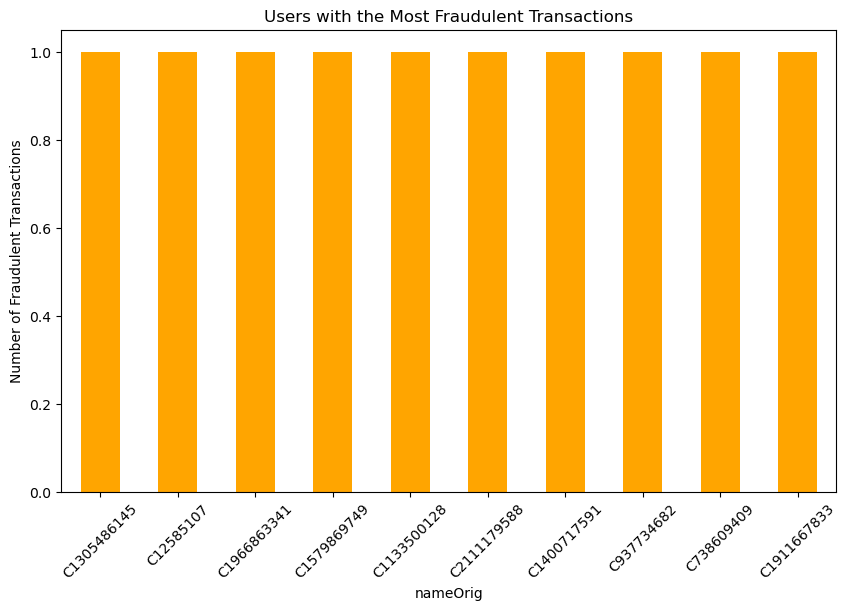

In [96]:
fraud_df = df[df['isFraud'] == 1]

fraud_counts = fraud_df['nameOrig'].value_counts()

top_fraudsters = fraud_counts.head(10)

plt.figure(figsize=(10, 6))
top_fraudsters.plot(kind='bar', color='orange')
plt.title('Users with the Most Fraudulent Transactions')
plt.xlabel('nameOrig')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.show()

Not even a Single user have repeated the fraud, so highest frauds detected by one user is '1'. There may be reasons such that after involving a fraud, he/she is chamging their accounts.

In [97]:
average_fraud_amount = fraud_df['amount'].mean()
average_fraud_oldbalanceOrg = fraud_df['oldbalanceOrg'].mean()

print("Average amount for fraudulent transactions:", average_fraud_amount)
print("Average oldbalanceOrg for fraudulent transactions:", average_fraud_oldbalanceOrg)

Average amount for fraudulent transactions: 1379846.707845659
Average oldbalanceOrg for fraudulent transactions: 1498825.376795696


By observing this average value, we can decrease the data size and analyze this data. We have considered average value of 2 attributes, because by outliers we have detected shown that these attributes has more significance.

### Relationship between Frauds and Amount transferred

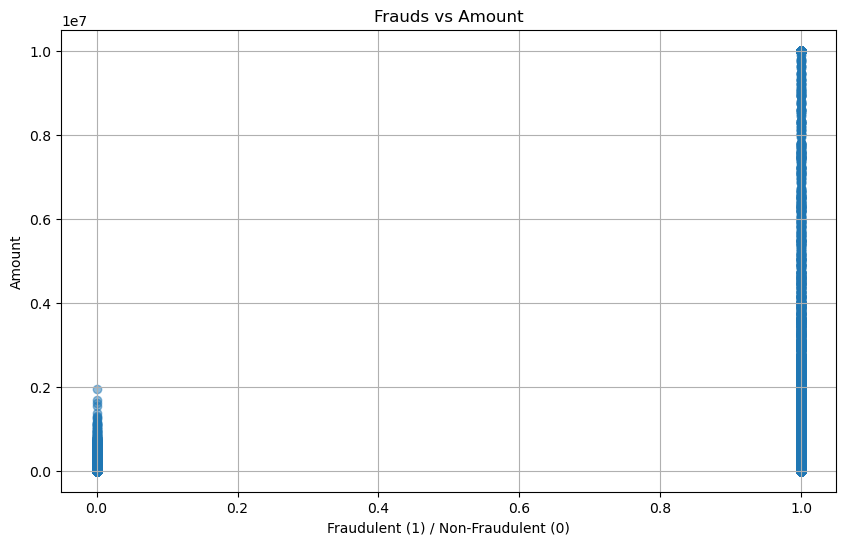

In [169]:
plt.figure(figsize=(10, 6))
plt.scatter(df['isFraud'],df['amount'], alpha=0.5)
plt.title('Frauds vs Amount')
plt.xlabel('Fraudulent (1) / Non-Fraudulent (0)')
plt.ylabel('Amount')
plt.grid(True)
plt.show()

### Distribution of Transaction Amounts for Fraudulent Transactions

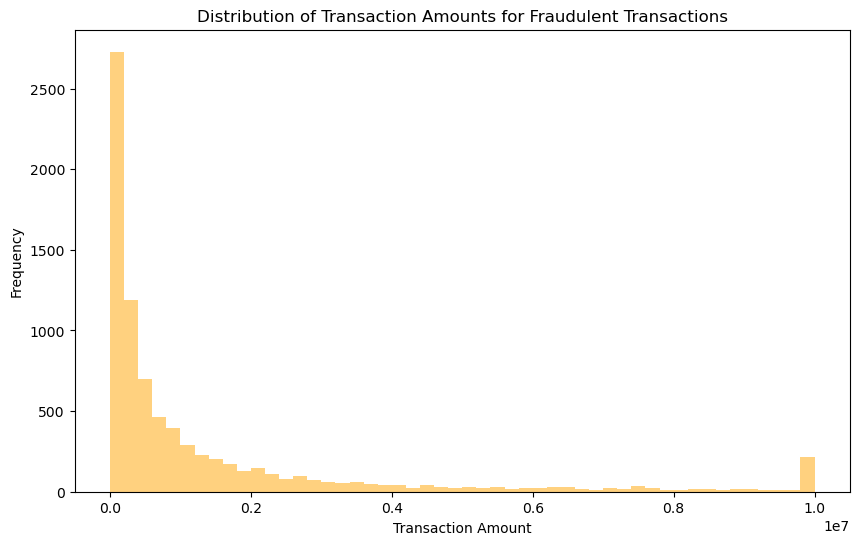

In [172]:
fraudulent_amounts = df[df['isFraud'] == 1]['amount']

plt.figure(figsize=(10, 6))
plt.hist(fraudulent_amounts, bins=50, color='orange', alpha=0.5)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts for Fraudulent Transactions')
plt.show()

### Distribution of Transaction Amounts for Legitimate Transactions

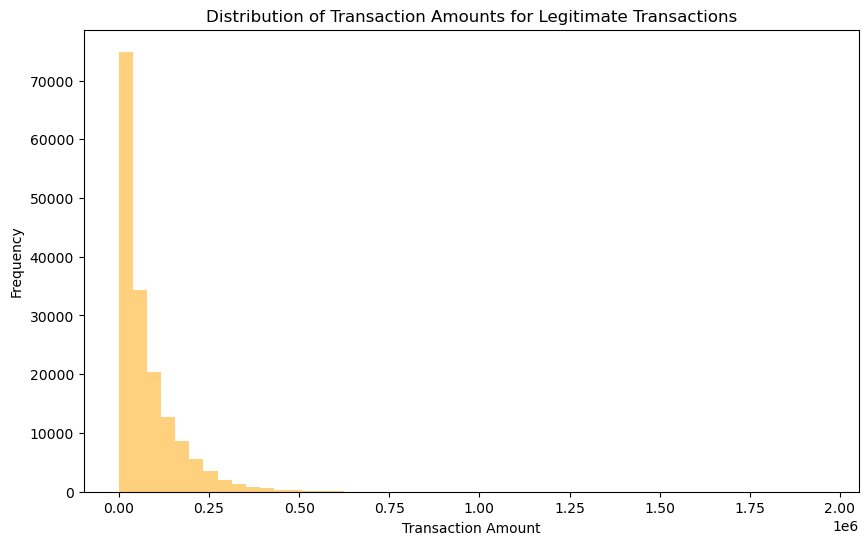

In [173]:
legitimate_amounts = df[df['isFraud'] == 0]['amount']

plt.figure(figsize=(10, 6))
plt.hist(legitimate_amounts, bins=50, color='orange', alpha=0.5)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts for Legitimate Transactions')
plt.show()

#### The above 2 plots describes that the amount > 2*10^6, are mostly involved in frauds

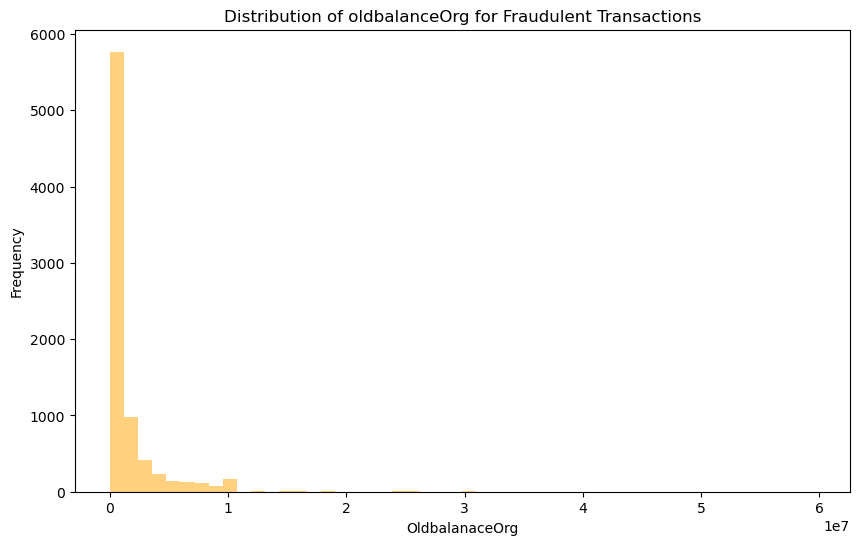

In [177]:
fraudulent_oldOrig = df[df['isFraud'] == 1]['oldbalanceOrg']

plt.figure(figsize=(10, 6))
plt.hist(fraudulent_oldOrig, bins=50, color='orange', alpha=0.5)
plt.xlabel('OldbalanaceOrg')
plt.ylabel('Frequency')
plt.title('Distribution of oldbalanceOrg for Fraudulent Transactions')
plt.show()

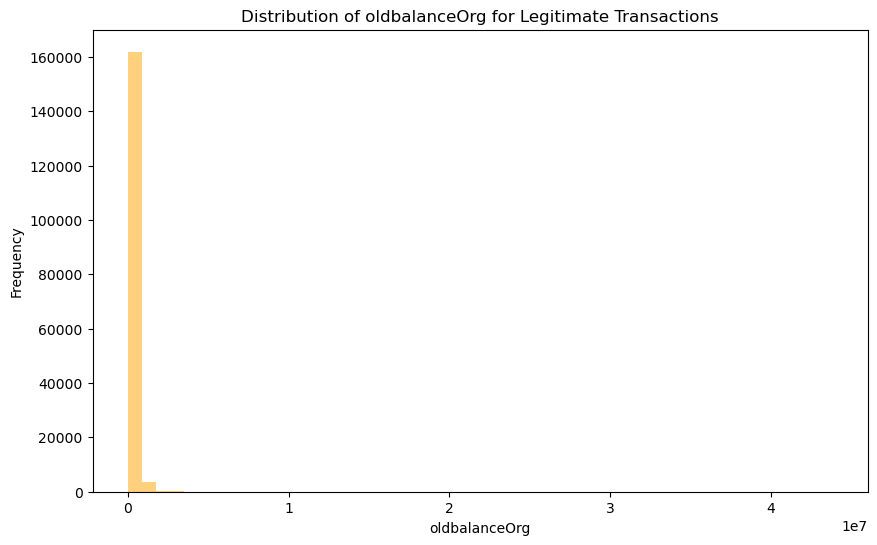

In [176]:
legitimate_oldOrig = df[df['isFraud'] == 0]['oldbalanceOrg']

plt.figure(figsize=(10, 6))
plt.hist(legitimate_oldOrig, bins=50, color='orange', alpha=0.5)
plt.xlabel('oldbalanceOrg')
plt.ylabel('Frequency')
plt.title('Distribution of oldbalanceOrg for Legitimate Transactions')
plt.show()

#### Shows almost similar distribution as amount

### Frauds vs time

In [178]:
df['step'] = ((df['step'] - 1) % 24) + 1

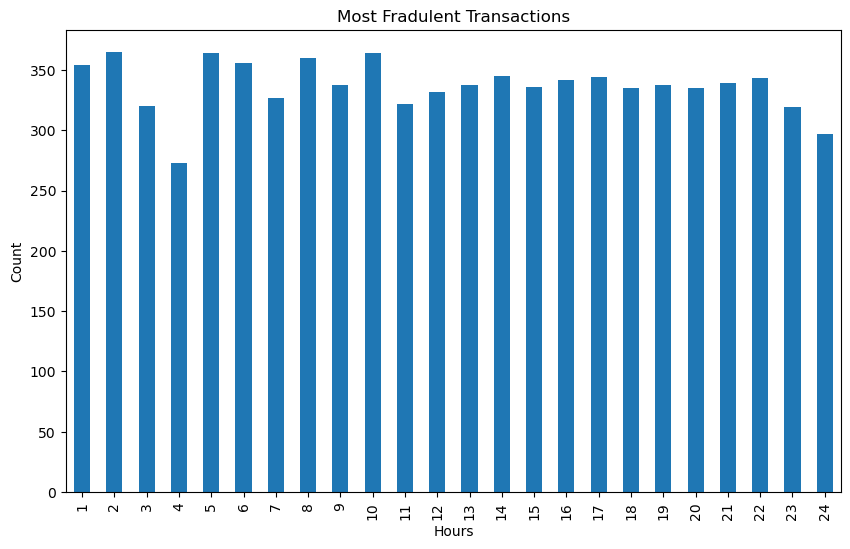

In [182]:
fraud_zero_counts = df[df['isFraud'] == 1]['step'].value_counts()
fraud_zero_counts=fraud_zero_counts.sort_index()

plt.figure(figsize=(10, 6))
fraud_zero_counts.plot(kind='bar')
plt.xlabel('Hours')
plt.ylabel('Count')
plt.title('Most Fradulent Transactions')
plt.show()

There is no common pattern in time for Fradulent Transactions.

## Multi collinearity

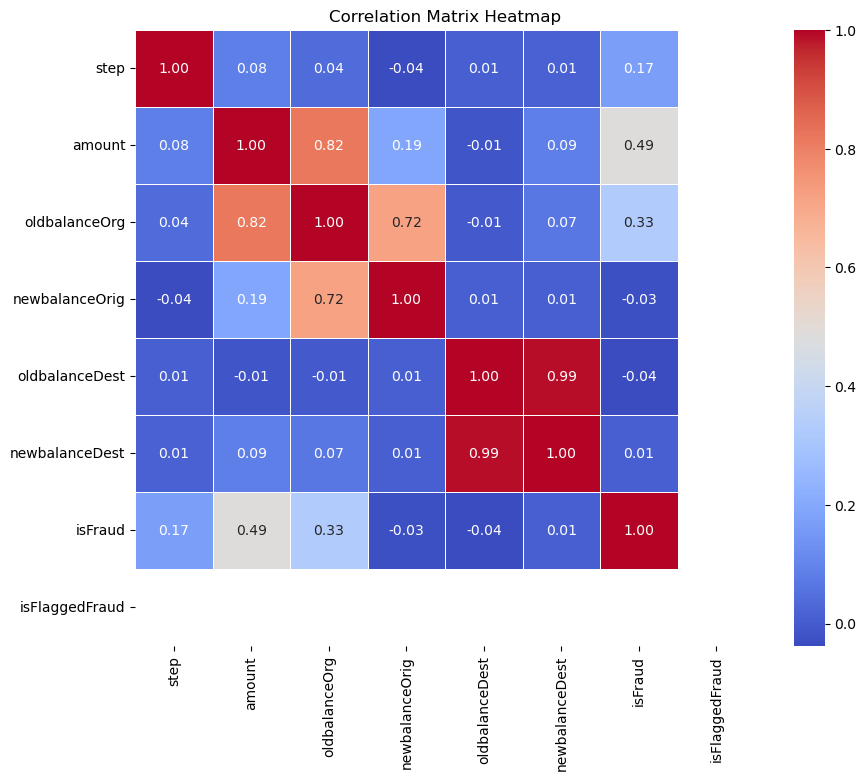

In [98]:
numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


By observing the correlation matrix, we can say that:
- **oldbalanceOrg** and **newbalanceOrig** are highly correlated.
- **oldbalanceDest** and **newbalanceDest** are highly correlated.

But we can't remove them directly, which will leads to loss of information. We use PCA as  remedy for multi collinearity.


## Checking multi-collinearity using Variance Inflation Factor(VIF)

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [100]:
X =df[['amount', 'oldbalanceDest', 'newbalanceDest', 'oldbalanceOrg', 'newbalanceOrig']]

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

          Feature        VIF
0          amount        inf
1  oldbalanceDest  82.360187
2  newbalanceDest  83.966368
3   oldbalanceOrg        inf
4  newbalanceOrig        inf


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


VIF = inf shows that this attribute can be predicted exactly from one or more attribute.

### Generally VIF > 10 shows that there is multi-collinearity. So there is Multi-Collinearity, Let's use PCA to avoid this.

## PCA(Principal Component Analysis) - Dimensionality Reduction Technique

### One-Hot Encoding

In [101]:
df_encoded = pd.get_dummies(df, columns=['type'], prefix='type')
df = df_encoded
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_TRANSFER
0,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.00,1,0,False,True
1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.00,1,0,True,False
2,1,2806.00,C1420196421,2806.0,0.00,C972765878,0.0,0.00,1,0,False,True
3,1,2806.00,C2101527076,2806.0,0.00,C1007251739,26202.0,0.00,1,0,True,False
4,1,7206.33,C478139423,24932.0,17725.67,C1032986144,21308.0,18161.79,0,0,False,True


In [102]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

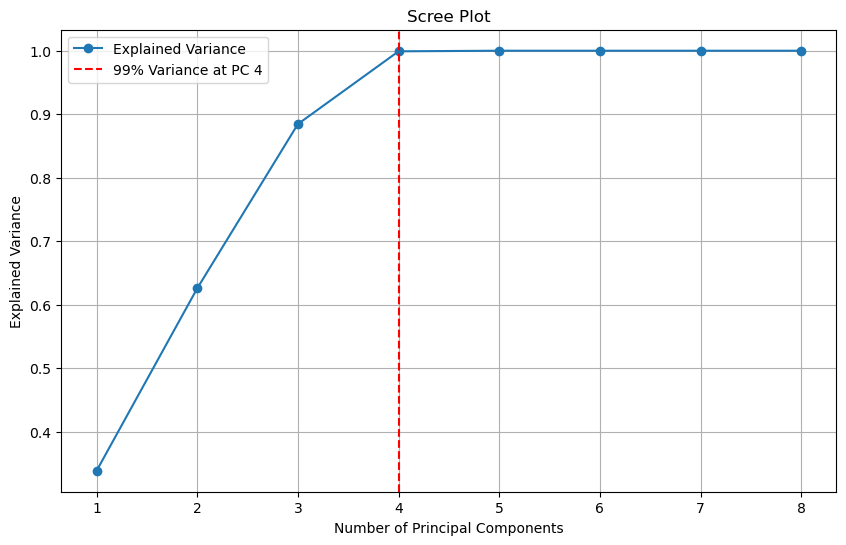

Number of components to retain for 99% cumulative variance: 4


In [133]:
numeric_columns = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'type_CASH_OUT', 'type_TRANSFER','isFlaggedFraud']]

scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(numeric_columns)

pca = PCA()
pca.fit(numeric_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

n_components_99 = np.argmax(cumulative_explained_variance >= 0.99) + 1

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='-', label='Explained Variance')
plt.axvline(x=n_components_95, color='r', linestyle='--', label=f'99% Variance at PC {n_components_95}')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.legend()
plt.grid(True)
plt.show()

print(f'Number of components to retain for 99% cumulative variance: {n_components_99}')

In [134]:
numeric_pca = pca.fit_transform(numeric_scaled)
retained_pca = numeric_pca[:, :n_components_99]
df_retained_pca = pd.DataFrame(retained_pca, columns=[f'PC{i+1}' for i in range(n_components_99)])

vif_data = pd.DataFrame()
vif_data["feature"] = df_retained_pca.columns
vif_data["VIF"] = [variance_inflation_factor(df_retained_pca.values, i) for i in range(df_retained_pca.shape[1])]

print(vif_data)

  feature  VIF
0     PC1  1.0
1     PC2  1.0
2     PC3  1.0
3     PC4  1.0


Now, No attribute has multi collinearity (since no VIF > 10) after performing PCA

## Modelling

### Linear Regression Model

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [136]:
numeric_pca = pca.fit_transform(numeric_scaled)

target = df['isFraud']

regressor = LinearRegression()
regressor.fit(numeric_pca, target)

print(f'Regression Coefficients: {regressor.coef_}')
print(f'Regression Intercept: {regressor.intercept_}')

from sklearn.metrics import mean_squared_error, r2_score

predictions = regressor.predict(numeric_pca)
mse = mean_squared_error(target, predictions)
r2 = r2_score(target, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Regression Coefficients: [ 5.78051210e-02 -1.08555308e-02 -1.08731958e-02 -8.16805289e-02
 -9.47134321e-02  6.24818508e+12  5.64654559e+09  0.00000000e+00]
Regression Intercept: 0.04642619298467142
Mean Squared Error: 0.03050510207219083
R-squared: 0.3112175357581901


In [137]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']) 
X = numeric_columns.drop(columns=['isFraud','isFlaggedFraud'])  
y = df['isFraud']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

y_pred_binary = [1 if pred > 0.99 else 0 for pred in y_pred]

accuracy = accuracy_score(y_test, y_pred_binary)

print(f'Accuracy: {accuracy}')

Accuracy: 0.955255600229753


### Logistic Regression

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [144]:
model = LogisticRegression(max_iter=1000)  
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.9785468121769099


## Regularization to avoid Over-fitting

In [150]:
strengths = [0.001, 0.01, 0.1, 1, 10, 100] 

results_with_reg = []

for C in strengths:
    model_with_reg = LogisticRegression(C=C, max_iter=1000)
    model_with_reg.fit(X_train, y_train)
    y_pred_with_reg = model_with_reg.predict(X_test)
    acc_with_reg = accuracy_score(y_test, y_pred_with_reg)
    results_with_reg.append(acc_with_reg)

optimal_C = strengths[results_with_reg.index(max(results_with_reg))]

print(f'Accuracy with regularization: {results_with_reg}')
print(f'Optimal regularization strength (C): {optimal_C}')

Accuracy with regularization: [0.9785468121769099, 0.9785468121769099, 0.9785468121769099, 0.9785468121769099, 0.9785468121769099, 0.9785468121769099]
Optimal regularization strength (C): 0.001


#### Accuracy is constant for all regularisation parameters shows that there is no over fitting of the model

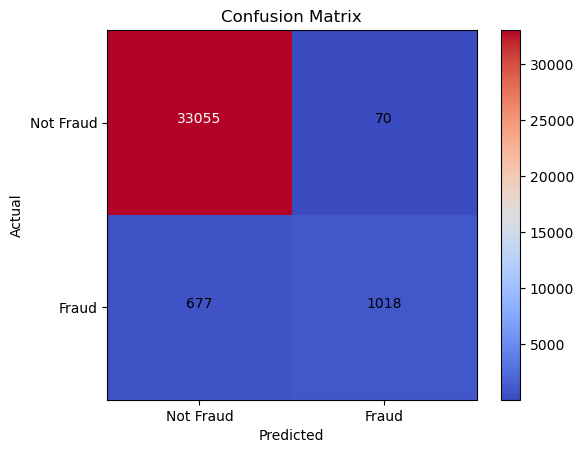

In [163]:
plt.imshow(conf_matrix, interpolation='nearest', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Not Fraud', 'Fraud'])
plt.yticks(tick_marks, ['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.show()

In [165]:
print("Classification Report :")
print(class_report)

Classification Report :
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     33125
           1       0.94      0.60      0.73      1695

    accuracy                           0.98     34820
   macro avg       0.96      0.80      0.86     34820
weighted avg       0.98      0.98      0.98     34820



Since the dataset is biased, it's better to look at f1-score instead of accuracy.

#### To avoid this, we can downsample or oversample of dataset, downsample can tends to loss in indormation, Oversampling can be done towards class with less instances. (We can generate synthetic data using SMOTE)

####  Data cleaning including missing values, outliers and multi-collinearity

There are no missing values. If present, we can replace them with appropriate statistics and mostly avoid dropping those rows.

We can detect outliers using boxplot, IQR (Interquartile Range), or z-score. We can remove outliers, but in this case, we shouldn't because most of the frauds detected are found in these outliers. Therefore, it's not a good idea to remove outliers in such a case.

Multi-collinearity is detected using Correlation and VIF (Variance Inflation Factor) and can be eliminated using PCA (Principal Component Analysis).


#### Describe your fraud detection model in elaboration.

After proper data cleaning:
- Relevant attributes are selected using outliers and PCA.
- Data is fed to the ML model (i.e., Linear and Logistic Regression).

####  How did you select variables to be included in the model? 

We have selected variables using outliers and retained PCA components which explain variance greater than 99%.

####  Demonstrate the performance of the model by using best set of tools.


- For **Linear Regression**, we achieved an accuracy of **95.52%**.
- For **Logistic Regression**, we achieved an accuracy of **97.85%** (ensuring the model is not overfitting).


####  What are the key factors that predict fraudulent customer?

**Key Factors:**
- Amount
- oldBalanceOrg


####  Do these factors make sense? If yes, How? If not, How not? 

Yes, these factors were detected using outliers and verified by comparing the coefficients of the Linear Regression model, which proved that these factors contribute more to fraud detection.


####  What kind of prevention should be adopted while company update its infrastructure? 

Detecting frauds is not enough; we have to prevent frauds.
- **Detection** can be done using the 'amount' attribute.
- **Prevention** can be done by analyzing 'oldBalanceOrg' before the transaction is made.
- Keep an eye on the customer, whose old balance is more than the threshold set by analyst.
- It's better to cluster the customers based on their balance.

#### Assuming these actions have been implemented, how would you determine if they work?

To calculate the accuracy of how many frauds have been pre-detected before they happened from the cluster of frauds detected by the analyst, we can use the following formula:

Accuracy = (Number of pre-detected frauds / Total number of detected frauds) * 100

Higher accuracy shows that our assumption was correct for a customer.
